## Data Cleaning & Merging
This notebook performs data cleaning, merging, and exploratory data analysis for the Credit Card Approval Prediction dataset.

Steps:

1. Clean `application_record.csv`

2. Aggregate and label `credit_record.csv`

3. Merge the datasets

4. Conduct basic EDA (distributions, correlations, imbalance)

## 1. Downloading, importing necessary package and getting data

In [1]:
%pip install pandas 
%pip install matplotlib
%pip install numpy
%pip install seaborn 


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
sns.set(style="whitegrid")

In [3]:
application= pd.read_csv('../data/application_record.csv')
record = pd.read_csv('../data/credit_record.csv')

## 2. Data Cleaning

### 2.1 Application Record Data

In [4]:
print("Application Record Info:")
print("Shape:", application.shape)
application.head()

Application Record Info:
Shape: (438557, 18)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

#### Handle duplicates

In [6]:
# check for duplicate IDs in application dataset
application[application['ID'].duplicated(keep=False)].sort_values('ID')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
426818,7022197,M,Y,Y,3,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11945,-735,1,0,0,1,Laborers,5.0
425023,7022197,F,N,Y,0,450000.0,Commercial associate,Higher education,Separated,House / apartment,-19813,-1799,1,0,0,1,NaN,1.0
431545,7022327,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-14771,-5298,1,0,0,0,High skill tech staff,1.0
431911,7022327,M,Y,Y,0,256500.0,Commercial associate,Higher education,Married,House / apartment,-21503,-1674,1,0,0,1,Core staff,2.0
425486,7023108,M,Y,Y,1,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15156,-1696,1,1,0,0,Core staff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,F,N,Y,2,292500.0,Working,Higher education,Married,House / apartment,-13747,-4386,1,0,1,0,Accountants,4.0
421464,7836971,M,Y,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13771,-5520,1,0,0,0,NaN,3.0
428620,7836971,F,N,Y,0,103500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13383,-2798,1,0,1,0,Sales staff,2.0
422068,7838075,M,N,Y,0,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18198,-1275,1,0,0,1,Drivers,2.0


From the output above, we can see that there are multiple rows with duplicated ID even though all the information may not be exactly the same. Since it is impossible to know which record is correct for that specific ID and keeping conflicting information for the same unique identifier compromises data integrity and would confuse any analysis or model, hence we have to completely remove them. Meanwhile, for rows with duplicated IDs and are exactly the same across all other columns, we will remove and leave one copy.

In [7]:
# create a variable 
dup_mask = application['ID'].duplicated(keep=False)

# among duplicate IDs, find groups where any column differs
conflict_mask = application.groupby('ID').transform('nunique').gt(1).any(axis=1)

# drop all rows for conflicting IDs, keep identical duplicates once
application = (
    application[~(dup_mask & conflict_mask)]
    .drop_duplicates()
    .reset_index(drop=True)
)
application.shape

(438463, 18)

#### Handle missing values

In [8]:
application.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134177
CNT_FAM_MEMBERS             0
dtype: int64

An initial data quality check reveals that OCCUPATION_TYPE is the only column with missing values. To decide on a handling strategy, we first need to understand the extent of the issue.

In [9]:
total_count = len(application)
percentage_missing = (application['OCCUPATION_TYPE'].isnull().sum()/ total_count) * 100
print(f"Percentage of missing values: {percentage_missing:.2f}%")

Percentage of missing values: 30.60%


With 30.6% of OCCUPATION_TYPE values missing, deleting these rows would severely compromise the dataset's integrity. To preserve all records and maintain the structural integrity of the data, we will impute these missing entries with 'Unknown'. This strategy ensures no data is lost and treats the absence of this information as a distinct category for analysis.

In [10]:
#replacing the missing values of occupation type
application['OCCUPATION_TYPE'] =   application['OCCUPATION_TYPE'].fillna('Unknown')

#### Handle feature engineering

In [11]:
#for age (count backwards from current day (0), -1 means yesterday)
application["AGE"] = (-application["DAYS_BIRTH"] / 365.25).astype(int) #for leap year for better accuracy 
application = application.drop(columns=["DAYS_BIRTH"])
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,Unknown,2.0,32
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,Unknown,2.0,32
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,1,0,0,0,Security staff,2.0,58
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1.0,52
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1.0,52


In [12]:
#for days employed (Count backwards from current day(0), positive values mean unemployed so we recode it)
application['DAYS_EMPLOYED_TEMP'] = application['DAYS_EMPLOYED'].apply(lambda x: np.nan if x > 0 else x)
application['IS_EMPLOYED'] = application['DAYS_EMPLOYED_TEMP'].notnull().astype(int)
application["YEARS_EMPLOYED"] = (-application["DAYS_EMPLOYED_TEMP"] / 365.25).abs().fillna(0).astype(float)
application = application.drop(columns=["DAYS_EMPLOYED", "DAYS_EMPLOYED_TEMP"])
application.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,IS_EMPLOYED,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Unknown,2.0,32,1,12.435318
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Unknown,2.0,32,1,12.435318
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,58,1,3.104723
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,1,8.353183
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,1,8.353183


In [13]:
#binary mapping 
application['FLAG_OWN_CAR'] = application['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
application['FLAG_OWN_REALTY'] = application['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

In [14]:
#changing column type 
application["CNT_FAM_MEMBERS"] = application["CNT_FAM_MEMBERS"].astype(int)

Text(0.5, 1.0, 'Distribution of Total Income (Applicants)')

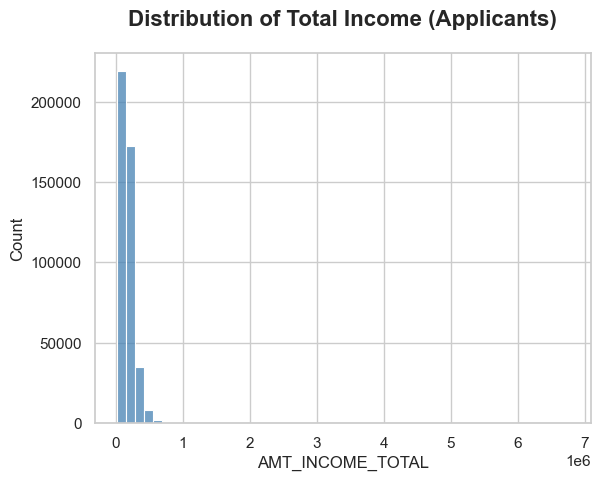

In [15]:
#further look at total income
sns.histplot(application, 
             x = 'AMT_INCOME_TOTAL',
             bins=50,              
             color='steelblue', 
             edgecolor='white', 
             linewidth=0.8)

plt.title(
    'Distribution of Total Income (Applicants)',
    fontsize=16,
    fontweight='bold',
    pad=20)

In [16]:
print(application.AMT_INCOME_TOTAL.min())
print(application.AMT_INCOME_TOTAL.max())


26100.0
6750000.0


While the histogram for AMT_INCOME_TOTAL might seem unusual, its shape is a classic example of a highly right-skewed distribution. The root cause is the vast scale of the data, driven by significant outliers. To illustrate, the income data spans from a minimum of 26100 to 6750000. This huge disparity forces the plot's axis to accommodate these very high values, which in turn compresses the visualization of the more densely populated, lower-income brackets. Since we understand that machine learning models, particularly those sensitive to feature scale like k-Nearest Neighbours, will not perform well with such skewed data. Hence, we also have to do feature engineering on this column.

Text(0.5, 1.0, 'Distribution of Log-Transformed Total Income (Applicants)')

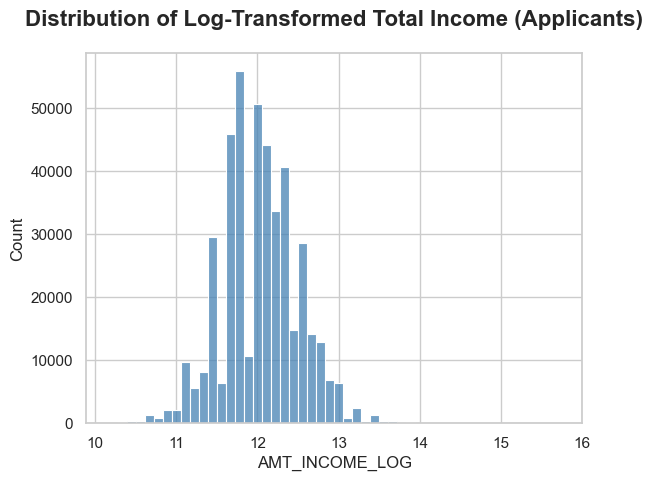

In [17]:
application['AMT_INCOME_LOG'] = np.log1p(application['AMT_INCOME_TOTAL'])

sns.histplot(application, 
             x = 'AMT_INCOME_LOG',
             bins=50,               
             color='steelblue', 
             edgecolor='white', 
             linewidth=0.8)

plt.title(
    'Distribution of Log-Transformed Total Income (Applicants)',
    fontsize=16,
    fontweight='bold',
    pad=20)

After applying the logarithm transformation, the new histogram is now approximately normal. As seen in the histogram, this transformation effectively mitigates the impact of extreme outliers and provides a much clearer view of the central tendency and spread of applicant incomes, making it a more suitable feature for our predictive models.

In [18]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,IS_EMPLOYED,YEARS_EMPLOYED,AMT_INCOME_LOG
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Unknown,2,32,1,12.435318,12.965712
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Unknown,2,32,1,12.435318,12.965712
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2,58,1,3.104723,11.630717
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,52,1,8.353183,12.506181
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,52,1,8.353183,12.506181


### 2.2 Credit Record Data

Based on global credit scoring standards such as the FICO score, any credit payment that is more than 30 days past due has a negative impact on an individual's credit score. Therefore, within our credit record table, we classify customers with a status of 2, 3, 4, or 5 as 'bad' or 'high-risk' clients, as these indicate a history of significant delinquency.

In [19]:
#create new variable for. further usage
status_map = {"X": -1, "C": 0, "0": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5}
record["STATUS_NUM"] = record["STATUS"].map(status_map)

In [20]:
def count_bad_months(series):
    return (series >= 2).sum()

record_agg = record.groupby("ID").agg(
    max_delay=('STATUS_NUM', 'max'), #to see the highest (worst) delay status to compare the peak risk level between individuals
    avg_delay=('STATUS_NUM', 'mean'), #to see the average delay status to compare the general payment tendency of individuals over time, a higher avg_delay indicates more consistent lateness.
    num_bad_months=('STATUS_NUM', count_bad_months), #to compare indivds with same max delay but diff num of bad months
    months_total=('STATUS_NUM', 'count') #to provide further context for model later 
).reset_index()

In [21]:
#create labels
record_agg["label"] = np.where(record_agg["max_delay"] >= 2, 1, 0)
record_agg.head()

,ID,max_delay,avg_delay,num_bad_months,months_total,label
0,5001711,0,-0.25,0,4,0
1,5001712,0,0.00,0,19,0
2,5001713,-1,-1.00,0,22,0
3,5001714,-1,-1.00,0,15,0
4,5001715,-1,-1.00,0,60,0


## 3. Merging Data

In [22]:
#merge using common column, id
merged = pd.merge(application, record_agg, on="ID", how="inner")
print("Merged dataset shape:", merged.shape)
merged.columns = [col.lower() for col in merged.columns] #to make it cleaner 

Merged dataset shape: (36457, 25)


In [23]:
merged.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,...,cnt_fam_members,age,is_employed,years_employed,amt_income_log,max_delay,avg_delay,num_bad_months,months_total,label
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,32,1,12.435318,12.965712,1,0.000000,0,16,0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,32,1,12.435318,12.965712,1,0.000000,0,15,0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,2,58,1,3.104723,11.630717,0,-0.533333,0,30,0
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,52,1,8.353183,12.506181,0,-0.600000,0,5,0
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,52,1,8.353183,12.506181,-1,-1.000000,0,5,0


In [27]:
merged.to_csv("../data/clean_merged.csv", index=False)

## 4. Exploratory Data Analysis on Merged Data

### 4.1 Target Variable

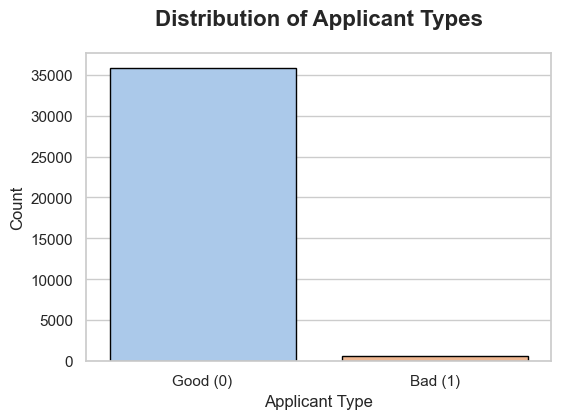

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(data=merged,x='label',hue='label', palette='pastel',edgecolor='black',legend=False)
plt.xticks(ticks=[0, 1], labels=["Good (0)", "Bad (1)"])

plt.title(
    'Distribution of Applicant Types',
    fontsize=16,
    fontweight='bold',
    pad=20)

plt.xlabel("Applicant Type")
plt.ylabel("Count")
plt.show()

In [25]:
print(merged["label"].value_counts(normalize=True))

label
0    0.983103
1    0.016897
Name: proportion, dtype: float64


The plot of the target variable shows a significant class imbalance, which is reinforced by the percentage. calculated where 98.3% of the borrowers are good. This indicates that the dataset is highly skewed toward non-defaulting clients. Such imbalance can negatively impact the performance of machine learning models, leading them to favor the majority class. Thus, we have to apply techniques such as SMOTE at later steps to improve model accuracy. 

### 4.2 Univariate Analysis

#### Numerical Variables

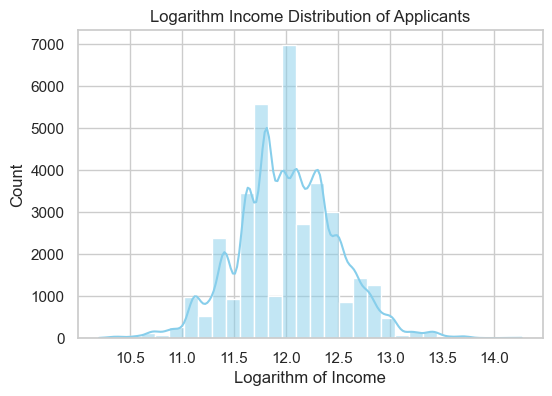

In [26]:
plt.figure(figsize=(6, 4))
sns.histplot(merged["amt_income_log"], bins=30, kde=True, color="skyblue")
plt.title("Logarithm Income Distribution of Applicants")
plt.xlabel("Logarithm of Income")
plt.ylabel("Count")
plt.show()

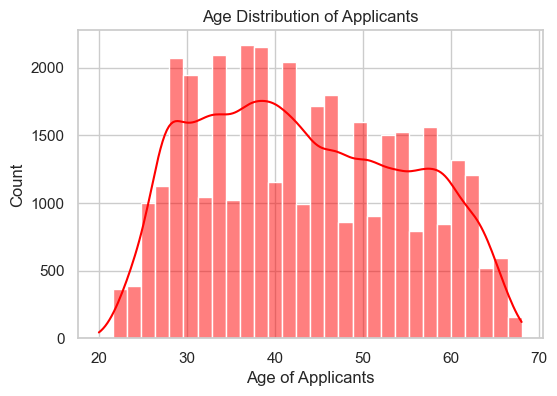

In [27]:
plt.figure(figsize=(6, 4))
sns.histplot(merged["age"], bins=30, kde=True, color="red")
plt.title("Age Distribution of Applicants")
plt.xlabel("Age of Applicants")
plt.ylabel("Count")
plt.show()

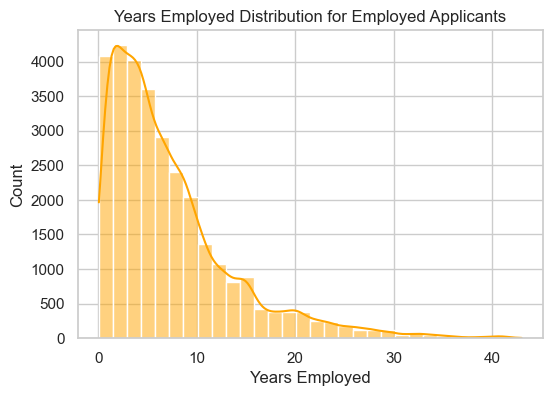

In [28]:
employed_df = merged[merged['is_employed'] == 1]
plt.figure(figsize=(6, 4))
sns.histplot(employed_df["years_employed"], bins=30, kde=True, color="orange")
plt.title("Years Employed Distribution for Employed Applicants")
plt.xlabel("Years Employed")
plt.ylabel("Count")
plt.show()

#### Categorical Variables

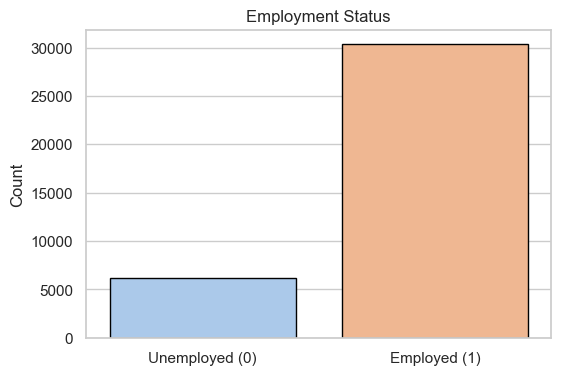

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(data=merged,x='is_employed', hue='is_employed', palette='pastel',edgecolor='black',legend=False)
plt.xticks(ticks=[0, 1], labels=["Unemployed (0)", "Employed (1)"])
plt.title("Employment Status")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

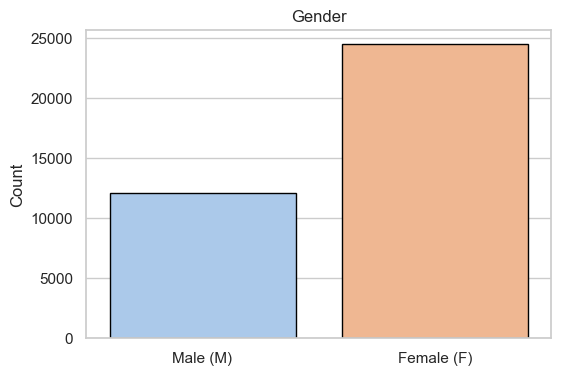

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(data=merged,x='code_gender', hue='code_gender', palette='pastel',edgecolor='black',legend=False)
plt.xticks(ticks=[0, 1], labels=["Male (M)", "Female (F)"])
plt.title("Gender")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

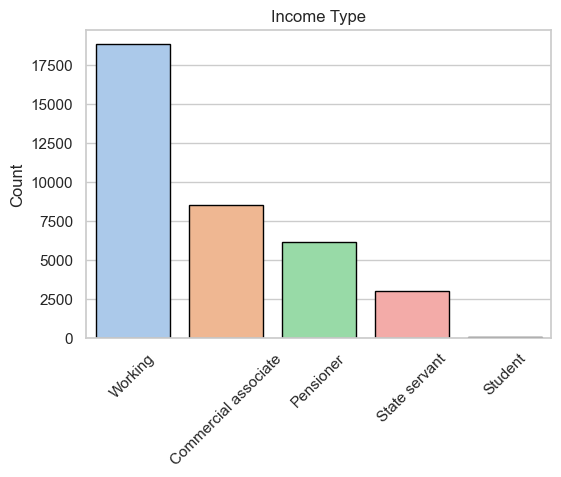

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(data=merged,x='name_income_type', hue='name_income_type', palette='pastel',edgecolor='black',legend=False)
plt.xticks(rotation=45)
plt.title("Income Type")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

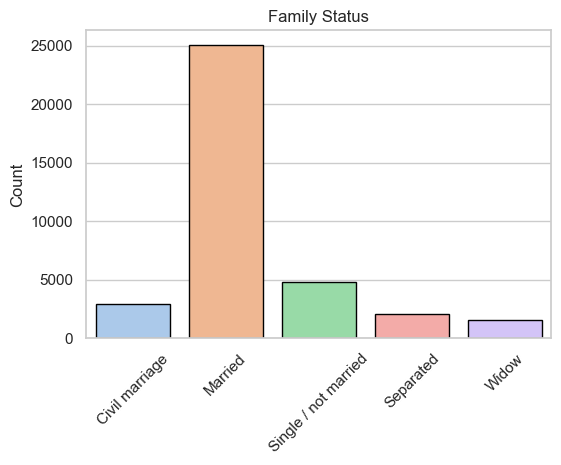

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(data=merged,x='name_family_status', hue='name_family_status', palette='pastel',edgecolor='black',legend=False)
plt.xticks(rotation=45)
plt.title("Family Status")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

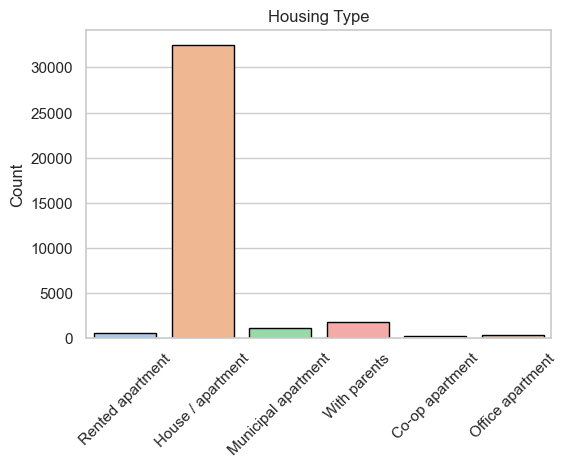

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(data=merged,x='name_housing_type', hue='name_housing_type', palette='pastel',edgecolor='black',legend=False)
plt.xticks(rotation=45)
plt.title("Housing Type")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

### 4.3 Bivariate/Multivariate Analysis

#### Numeric vs Numeric Variables

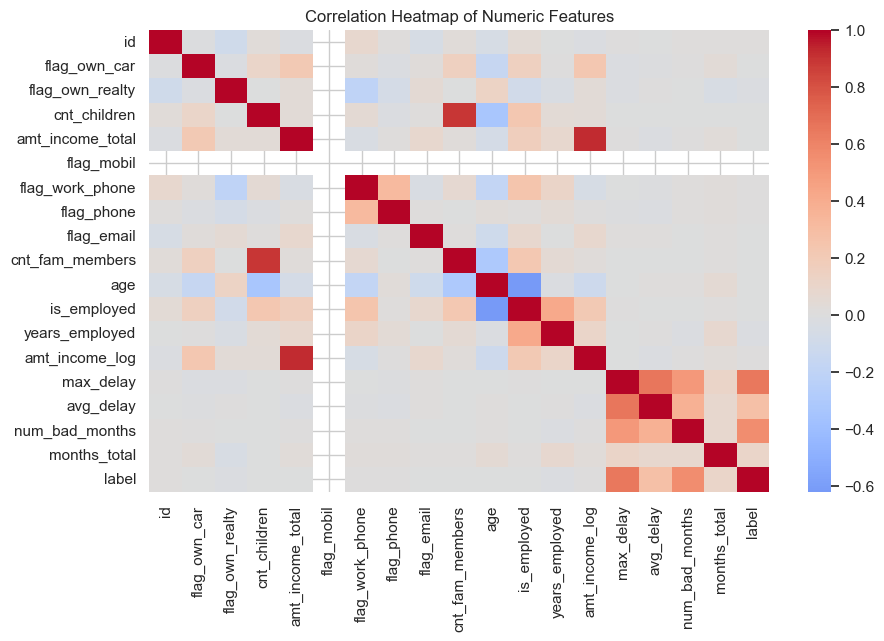

In [34]:
numeric_cols = merged.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 6))
sns.heatmap(merged[numeric_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

#### Numeric Variable vs Target Variable

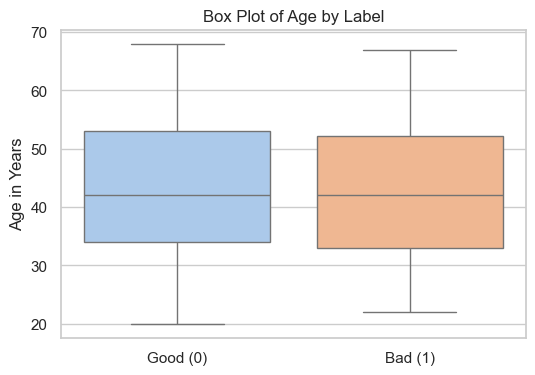

In [35]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=merged, x='label', y='age', palette='pastel', hue='label', legend=False)
plt.title('Box Plot of Age by Label')
plt.ylabel('Age in Years')
plt.xlabel("")
plt.xticks(ticks=[0, 1], labels=["Good (0)", "Bad (1)"])
plt.show()

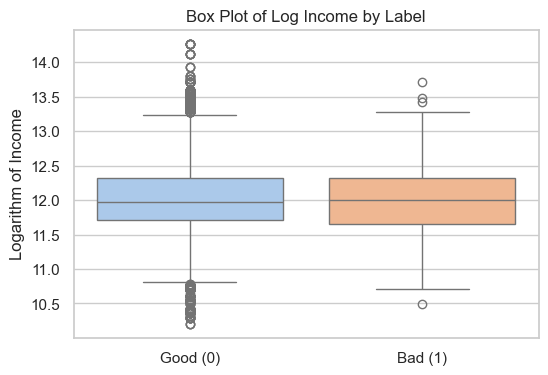

In [36]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=merged, x='label', y='amt_income_log', palette='pastel', hue='label', legend=False)
plt.title('Box Plot of Log Income by Label')
plt.ylabel('Logarithm of Income')
plt.xlabel("")
plt.xticks(ticks=[0, 1], labels=["Good (0)", "Bad (1)"])
plt.show()

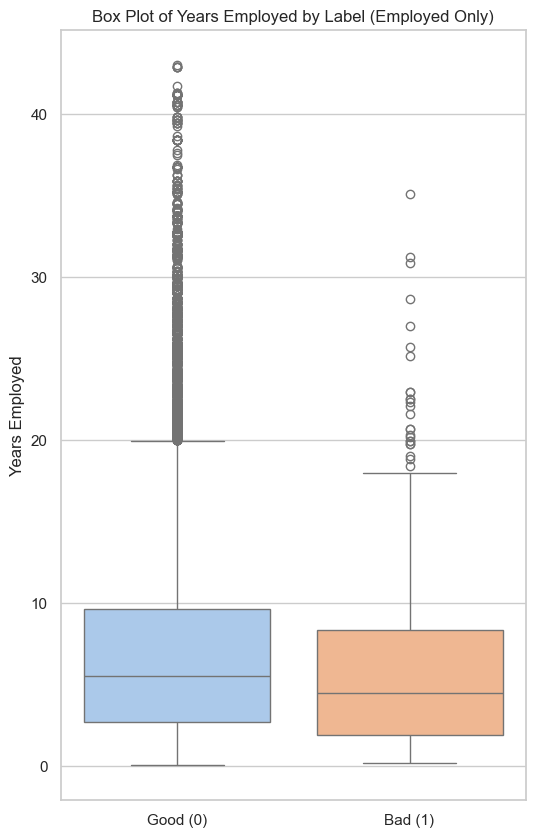

In [37]:
plt.figure(figsize=(6, 10))
sns.boxplot(data=merged[merged['is_employed']==1], x='label', y='years_employed', palette='pastel', hue='label', legend=False) 
plt.title('Box Plot of Years Employed by Label (Employed Only)')
plt.ylabel('Years Employed')
plt.xlabel("")
plt.xticks(ticks=[0, 1], labels=["Good (0)", "Bad (1)"])
plt.show()

#### Categorical Variable vs Target Variable

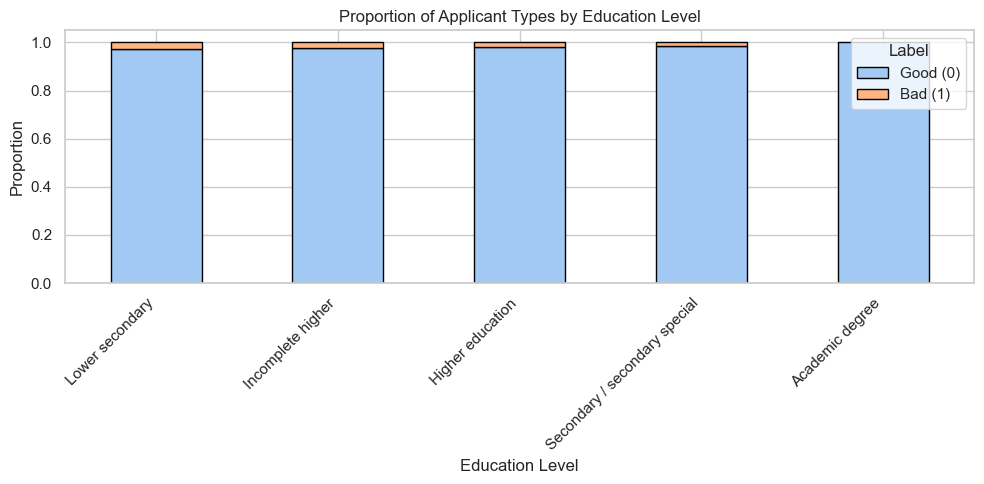

In [38]:
prop_df = merged.groupby('name_education_type')['label'].value_counts(normalize=True).unstack().fillna(0)
prop_df = prop_df.sort_values(by=1, ascending=False) 

fig, ax = plt.subplots(figsize=(10, 5))
prop_df.plot(kind='bar', stacked=True, color=sns.color_palette('pastel', 2), ax=ax, edgecolor='black')

plt.title('Proportion of Applicant Types by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Label', labels=['Good (0)', 'Bad (1)'])
plt.tight_layout()
plt.show()

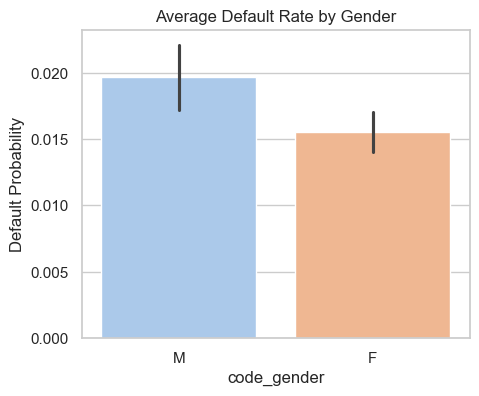

In [39]:
plt.figure(figsize=(5,4))
sns.barplot(data=merged,x="code_gender", y="label", palette='pastel',hue='code_gender', legend=False)
plt.title("Average Default Rate by Gender")
plt.ylabel("Default Probability")
plt.show()

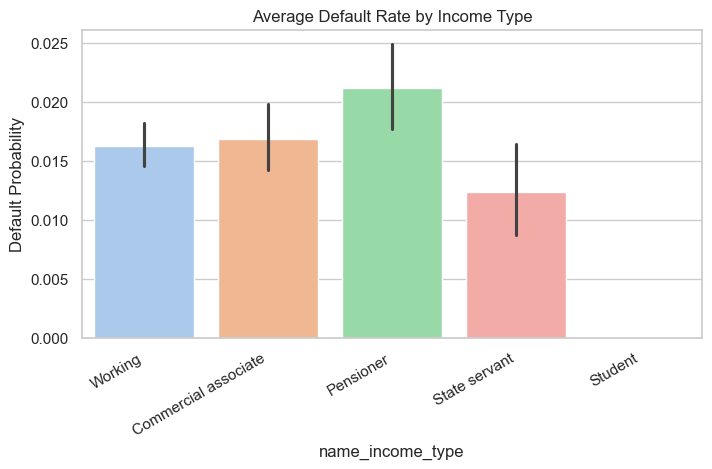

In [40]:
plt.figure(figsize=(8,4))
sns.barplot(data=merged,x="name_income_type", y="label", palette='pastel',hue='name_income_type', legend=False)
plt.title("Average Default Rate by Income Type")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Default Probability")
plt.show()

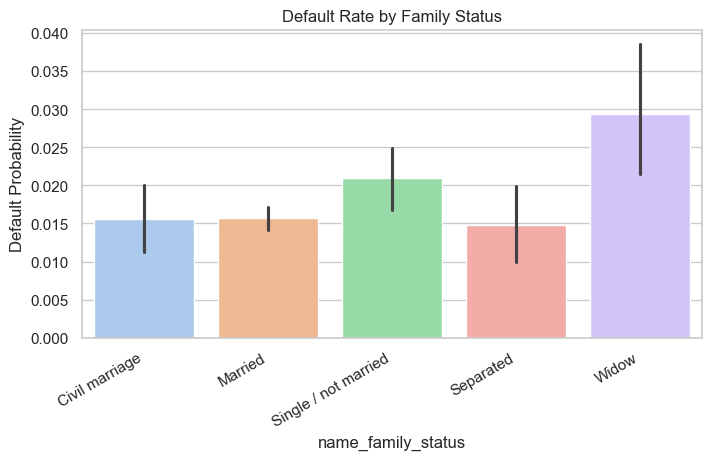

In [41]:
plt.figure(figsize=(8,4))
sns.barplot(data=merged,x="name_family_status", y="label", palette='pastel',hue='name_family_status', legend=False)
plt.title("Default Rate by Family Status")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Default Probability")
plt.show()